In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [np.random.randint(10) for i in range(10)]
x

[1, 9, 0, 5, 0, 2, 3, 5, 2, 4]

In [3]:
def softmax(rand_var):
    return np.exp(rand_var)/sum(np.exp(rand_var))

In [4]:
s = softmax(x)
s

array([3.20020358e-04, 9.53967243e-01, 1.17728911e-04, 1.74725195e-02,
       1.17728911e-04, 8.69905524e-04, 2.36464838e-03, 1.74725195e-02,
       8.69905524e-04, 6.42778072e-03])

In [5]:
softmax(s)

array([0.08592079, 0.22297798, 0.08590341, 0.08740725, 0.08590341,
       0.08596805, 0.08609664, 0.08740725, 0.08596805, 0.08644718])

In [6]:
xx = [-1*1e-20, -1*1e-20]
softmax(xx)

array([0.5, 0.5])

In [7]:
def softmax_(rand_var):
    z = np.array(rand_var) - max(rand_var)
    return softmax(z)

In [8]:
softmax_(x)

array([3.20020358e-04, 9.53967243e-01, 1.17728911e-04, 1.74725195e-02,
       1.17728911e-04, 8.69905524e-04, 2.36464838e-03, 1.74725195e-02,
       8.69905524e-04, 6.42778072e-03])

In [9]:
softmax_(xx)

array([0.5, 0.5])

In [10]:
# Gradient Descent
def grad_descent_step(x, f, e):
    x = x - e*grad_(f)
    return x

4.5 Example: Linear Least Squares

In [11]:
n = 50
x = np.arange(n)

m = np.random.uniform(0.3, 0.8, (n,))
b = np.random.uniform(5, 10, (n,))

y = x*m + b 

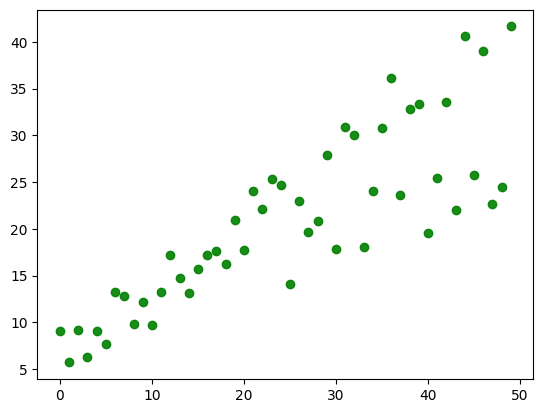

In [12]:
plt.scatter(x, y, s=None, marker='o', color='g', edgecolors='g', alpha=0.9)

In [13]:
# plt.scatter(x-x.mean(0), y-y.mean(0), s=None, marker='o', color='g', edgecolors='g', alpha=0.9)

In [14]:
x.shape, y.shape

((50,), (50,))

In [15]:
A = x.reshape(-1,1)
b = y.reshape(-1,1)

In [16]:
del x
del y

In [17]:
# # A@np.random.rand(A.shape[0], 1)
# np.random.rand(A.shape[1], 1).shape, A.shape

In [18]:
# np.linalg.norm(A@np.random.rand(A.shape[1], 1)-b)

In [19]:
def lstq_with_gradient_descent(A, b, epsilon, delta):
    x = np.random.rand(A.shape[1], 1)
    last_error = 0
    while np.abs(np.linalg.norm(A@x-b)-last_error) > delta:
        last_error = np.linalg.norm(A@x-b)
        grad = (A.T@A@x-A.T@b)/A.shape[0]
        x = x - epsilon*grad
        print("error", last_error)
#         print("error", np.linalg.norm(A@x-b), last_error, np.abs(np.linalg.norm(A@x-b)-last_error))
    return x

In [20]:
x = lstq_with_gradient_descent(A, b, 0.0001, 1e-5)

error 50.121523695400754
error 49.261151181404074
error 48.5223897185141
error 47.889376562518606
error 47.34798911210248
error 46.88573371264529
error 46.49162180733141
error 46.156039196804315
error 45.870613503201405
error 45.628084008517966
error 45.42217703197938
error 45.24748905168778
error 45.099378935938326
error 44.97386996225194
error 44.86756177203128
error 44.77755202329173
error 44.70136724197214
error 44.63690220994671
error 44.58236714193291
error 44.53624187365121
error 44.49723629296041
error 44.4642562809203
error 44.436374480680556
error 44.4128052713298
error 44.39288338611699
error 44.37604567622591
error 44.361815580265024
error 44.34978991447812
error 44.339627648693394
error 44.33104037796814
error 44.323784239808404
error 44.31765306198941
error 44.31247255672276
error 44.30809540361078
error 44.30439708691598
error 44.30127237256239
error 44.29863232736559
error 44.29640179761605
error 44.294517276641024
error 44.292925101633074
error 44.29157992911502
error 

In [21]:
x

array([[0.7688682]])

In [22]:
x_l = np.linalg.lstsq(A, b)[0]
x_l

array([[0.7685488]])

In [23]:
np.linalg.norm(A@x-b), np.linalg.norm(A@x_l-b)

(np.float64(44.28430154584117), np.float64(44.28425498471105))

In [24]:
def lstq_with_newtons_method(A, b, num_it):
    x = np.random.rand(A.shape[1], 1)
    for i in range(num_it):
        print(np.linalg.norm(A@x-b))
        hessian_mat = A.T@A # if hessian_mat is positive definite - convex
        grad = (A.T@A@x-A.T@b) 
        x = x - np.linalg.inv(hessian_mat)@grad
    return x

In [25]:
# as the function is convex it founds the solution in one step
x_h = lstq_with_newtons_method(A, b, 10)

44.28526056918425
44.28425498471104
44.28425498471105
44.28425498471104
44.28425498471105
44.28425498471104
44.28425498471105
44.28425498471104
44.28425498471105
44.28425498471104


In [26]:
x_h

array([[0.7685488]])

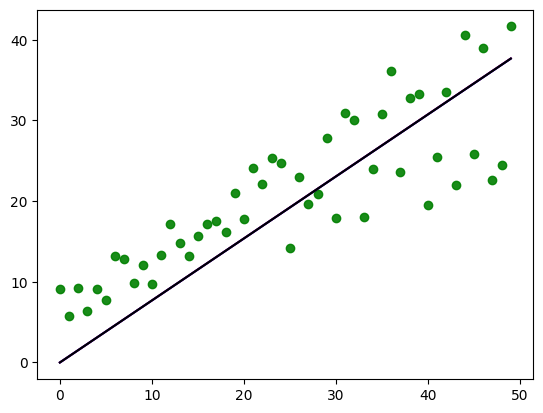

In [27]:
plt.scatter(A, b, s=None, marker='o', color='g', edgecolors='g', alpha=0.9)
plt.plot(A, A@x, '-', color='red')
plt.plot(A, A@x_h, '-', color='blue')
plt.plot(A, A@x_l, '-', color='black')
plt.show()

In [28]:
# high dimensions
A = np.random.uniform(0.3, 0.8, (30, 20))
b = np.random.uniform(4, 6, (30, 1))

In [29]:
A.shape, b.shape

((30, 20), (30, 1))

In [30]:
x_np = np.linalg.lstsq(A, b)

In [31]:
x_gd = lstq_with_gradient_descent(A, b, 0.1, 1e-5)

error 9.629630116320126
error 4.965045431178146
error 3.7688736090855937
error 3.546705685415637
error 3.507767808999323
error 3.498095494706472
error 3.492959096864715
error 3.4885395601906013
error 3.4842507199169908
error 3.4800025683208418
error 3.475781157587608
error 3.471584198562488
error 3.467411190025514
error 3.463261905863804
error 3.4591361632063973
error 3.455033786882052
error 3.450954603965741
error 3.4468984429365426
error 3.4428651335423064
error 3.438854506772638
error 3.4348663948485103
error 3.430900631214435
error 3.4269570505310334
error 3.423035488667715
error 3.419135782695345
error 3.415257770878965
error 3.41140129267052
error 3.407566188701611
error 3.403752300776259
error 3.399959471863705
error 3.39618754609122
error 3.3924363687369348
error 3.3887057862227072
error 3.38499564610699
error 3.3813057970777347
error 3.377636088945319
error 3.373986372635486
error 3.3703565001823166
error 3.366746324721222
error 3.363155700481957
error 3.359584482781656
error 

In [32]:
x_nm = lstq_with_newtons_method(A, b, 100)

5.26723698089467
1.4480472930889166
1.4480472930889166
1.4480472930889163
1.448047293088917
1.448047293088917
1.448047293088917
1.4480472930889166
1.4480472930889163
1.4480472930889177
1.4480472930889166
1.448047293088916
1.448047293088917
1.4480472930889172
1.4480472930889168
1.4480472930889166
1.448047293088917
1.4480472930889174
1.4480472930889172
1.448047293088917
1.4480472930889159
1.448047293088917
1.448047293088916
1.4480472930889166
1.4480472930889166
1.4480472930889166
1.4480472930889159
1.4480472930889166
1.4480472930889157
1.4480472930889159
1.448047293088917
1.4480472930889166
1.4480472930889168
1.448047293088917
1.4480472930889166
1.448047293088916
1.4480472930889166
1.448047293088917
1.4480472930889174
1.448047293088916
1.4480472930889172
1.4480472930889166
1.4480472930889177
1.4480472930889166
1.448047293088917
1.4480472930889179
1.4480472930889166
1.4480472930889163
1.448047293088917
1.4480472930889166
1.4480472930889163
1.448047293088917
1.4480472930889168
1.4480472930

In [33]:
Q,R = np.linalg.qr(A)
x_qr = np.linalg.inv(R)@Q.T@b

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(A, b)

x_sk = lr.predict(A)

In [35]:
np.linalg.norm(x_sk-b)

np.float64(1.4480472930889166)

In [36]:
np.linalg.norm(A@x_np[0]-b, ), np.linalg.norm(A@x_gd-b), np.linalg.norm(A@x_nm-b), np.linalg.norm(x_sk-b), np.linalg.norm(A@x_qr-b)

(np.float64(1.4480472930889166),
 np.float64(1.4764001511862008),
 np.float64(1.4480472930889172),
 np.float64(1.4480472930889166),
 np.float64(1.448047293088917))

In [37]:
A_centralized = A - A.mean(0)
b_centralized = b - b.mean(0)
# A_centralized = A - A.mean(axis=1)[:, np.newaxis]

In [38]:
lrr = LinearRegression(fit_intercept=True)
lrr.fit(A, b)

x_sk = lr.predict(A)

lrr.intercept_

array([3.65265851])

In [39]:
x_np_cent = np.linalg.lstsq(A_centralized, b_centralized)

In [40]:
A_centralized.shape, b.shape

((30, 20), (30, 1))

In [41]:
A_centralized.shape, x_np_cent[0].shape, 

((30, 20), (20, 1))

In [42]:
np.linalg.norm(A_centralized@x_np_cent[0]-b_centralized)

np.float64(1.2829759089058685)

In [43]:
x_gd_cent = lstq_with_gradient_descent(A_centralized, b_centralized, 0.1, 1e-5)

error 3.6229426490628995
error 3.6143520576336208
error 3.6058119379178586
error 3.597321958608629
error 3.5888817903880765
error 3.5804911059183557
error 3.5721495798325553
error 3.5638568887256468
error 3.5556127111454616
error 3.547416727583695
error 3.5392686204669386
error 3.5311680741477423
error 3.5231147748956984
error 3.5151084108885557
error 3.5071486722033582
error 3.499235250807614
error 3.4913678405504793
error 3.4835461371539824
error 3.4757698382042586
error 3.4680386431428243
error 3.460352253257857
error 3.45271037167552
error 3.4451127033512967
error 3.437558955061356
error 3.4300488353939347
error 3.4225820547407504
error 3.4151583252884357
error 3.4077773610099915
error 3.400438877656266
error 3.3931425927474548
error 3.3858882255646283
error 3.3786754971412742
error 3.371504130254864
error 3.364373849418446
error 3.3572843808722532
error 3.3502354525753404
error 3.343226794197232
error 3.3362581371096054
error 3.3293292143779807
error 3.3224397607534395
error 3.315

In [44]:
x_nm_cent = lstq_with_newtons_method(A_centralized, b_centralized, 100)

3.3383484334543336
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058688
1.2829759089058688
1.2829759089058685
1.2829759089058688
1.2829759089058685
1.2829759089058685
1.2829759089058688
1.2829759089058688
1.2829759089058685
1.2829759089058688
1.2829759089058688
1.2829759089058688
1.2829759089058685
1.2829759089058685
1.2829759089058688
1.2829759089058688
1.2829759089058688
1.2829759089058688
1.2829759089058685
1.2829759089058685
1.2829759089058683
1.2829759089058685
1.2829759089058685
1.2829759089058688
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058688
1.2829759089058688
1.2829759089058685
1.2829759089058685
1.2829759089058688
1.2829759089058688
1.2829759089058688
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089058685
1.2829759089

In [45]:
Q,R = np.linalg.qr(A_centralized)
x_qr_cent = np.linalg.inv(R)@Q.T@b

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(A, b)

x_sk_cent = lr.predict(A)

In [47]:
# we see that centralizing the data is necessary, as the OLS finds the best line that passes through the origin
np.linalg.norm(A_centralized@x_np_cent[0]-b_centralized, ), np.linalg.norm(A_centralized@x_gd_cent-b_centralized), np.linalg.norm(A_centralized@x_nm_cent-b_centralized), np.linalg.norm(x_sk_cent-b), np.linalg.norm(A_centralized@x_qr_cent-b_centralized)

(np.float64(1.2829759089058685),
 np.float64(1.318910646894086),
 np.float64(1.2829759089058685),
 np.float64(1.2829759089058685),
 np.float64(1.2829759089058685))

In [48]:
np.linalg.norm(A@x_np[0]-b, ), np.linalg.norm(A@x_gd-b), np.linalg.norm(A@x_nm-b), np.linalg.norm(x_sk-b), np.linalg.norm(A@x_qr-b)

(np.float64(1.4480472930889166),
 np.float64(1.4764001511862008),
 np.float64(1.4480472930889172),
 np.float64(1.4480472930889166),
 np.float64(1.448047293088917))